# **Generation of Read Pileups**

First, let's download the data for this notebook.

In [1]:
import os
import sys

# Append the root of the Git repository to the path.
git_root = os.popen(cmd="git rev-parse --show-toplevel").read().strip()
sys.path.append(git_root)

In [20]:
# %pip install requests
# %pip install tqdm
# %pip install pandas
# %pip install biopython
%pip install matplotlib

  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp39-cp39-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -------------- ------------------------- 2.9/7.8 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 25.5 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 1.5/1.5 MB 27.3 MB/s  0:00:00

   ---------------------------------------- 0/7 [pyparsing]
   ----------- ---------------------------- 2/7 [importlib-resources]
   ---

In [6]:
from utils import download_file

if not os.path.exists(path="data"):
    os.makedirs(name="data")

download_file(
    # url="https://dataverse.harvard.edu/api/access/datafile/10494346",
    url="https://seafile.cloud.uni-hannover.de/d/5d6029c6eaaf410c8b01/files/?p=%2Fread_pileups%2Fe-coli-dh10b.fasta&dl=1",
    save_filename="data/e-coli-dh10b.fasta",
)

Downloading: https://seafile.cloud.uni-hannover.de/d/5d6029c6eaaf410c8b01/files/?p=%2Fread_pileups%2Fe-coli-dh10b.fasta&dl=1 -> data/e-coli-dh10b.fasta
Total size: 4,754,525 bytes


100%|██████████| 4.75M/4.75M [00:00<00:00, 14.8MiB/s]

Download completed: data/e-coli-dh10b.fasta


In [7]:
from typing import Dict, List

import numpy.typing as npt

# DNA Sequencing Simulation

By randomly sampling substrings from a larger reference sequence, we can simulate an error-free DNA sequencing process.

##### ❓ Sampling reads from a reference sequence

Complete the function `sample_reads()` to sample `n_reads` reads from the string `reference_sequence` with a minimum/maximum read length of `min_read_len`/`max_read_len`.
A read shall be stored in a dictionary that contains two key-value pairs: the 0-based mapping position of the read on the reference sequence (key `'pos'`) and the read sequence (key `'seq'`).
The function shall hence return a list (of length `n_reads`) of dictionaries.

This is how an example dictionary might look like:

```
{'pos': 4, 'seq': 'TTTCATTCTGACTGCAACGGGCAATA'}
```

In [8]:
import random


def sample_reads(
    reference_sequence: str, n_reads: int, min_read_len: int, max_read_len: int
) -> List[Dict]:
    """Sample reads from a reference sequence."""
    reads = []

    while len(reads) < n_reads:
        range_acquired = False
        while not range_acquired:
            start_position = random.randrange(len(reference_sequence))
            end_position = random.randrange(len(reference_sequence))
            if start_position > end_position:
                continue
            range_len = end_position - start_position + 1
            if range_len < min_read_len or range_len > max_read_len:
                continue
            range_acquired = True
            read = reference_sequence[start_position : (end_position + 1)]
            reads.append({"pos": start_position, "seq": read})

    return reads

##### ❓ Sampling reads from a reference sequence

Now use the function `sample_reads()` to sample 20 reads from the following reference sequence:

```
AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
```

Set the other parameters as follows: `n_reads=20`, `min_read_len=15`, `max_read_len=40`.

In [9]:
reference_sequence = (
    "AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC"
)

reads = sample_reads(
    reference_sequence=reference_sequence, n_reads=20, min_read_len=15, max_read_len=40
)

print(reads)

[{'pos': 6, 'seq': 'TCATTCTGACTGCAACGGGCAATATG'}, {'pos': 14, 'seq': 'ACTGCAACGGGCAAT'}, {'pos': 26, 'seq': 'AATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAG'}, {'pos': 30, 'seq': 'TGTCTCTGTGTGGATTAAAAAAAGAGT'}, {'pos': 23, 'seq': 'GGCAATATGTCTCTGTGTGGATTAAA'}, {'pos': 20, 'seq': 'ACGGGCAATATGTCTCTGTGTGGAT'}, {'pos': 20, 'seq': 'ACGGGCAATATGTCTCTGT'}, {'pos': 21, 'seq': 'CGGGCAATATGTCTCTGTGTGGATTAAAAA'}, {'pos': 24, 'seq': 'GCAATATGTCTCTGTGTGGATTAAAAA'}, {'pos': 47, 'seq': 'AAAAAAGAGTGTCTGATA'}, {'pos': 18, 'seq': 'CAACGGGCAATATGTCTCTGTGTGGATTA'}, {'pos': 19, 'seq': 'AACGGGCAATATGTCTCTGTGTGGA'}, {'pos': 29, 'seq': 'ATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATA'}, {'pos': 51, 'seq': 'AAGAGTGTCTGATAGCA'}, {'pos': 21, 'seq': 'CGGGCAATATGTCTCTGTGTGGA'}, {'pos': 4, 'seq': 'TTTCATTCTGACTGCAACGGGCAATATGTCTCTG'}, {'pos': 16, 'seq': 'TGCAACGGGCAATATGTCTCTG'}, {'pos': 51, 'seq': 'AAGAGTGTCTGATAGCAG'}, {'pos': 21, 'seq': 'CGGGCAATATGTCTCTGTGTG'}, {'pos': 6, 'seq': 'TCATTCTGACTGCAACGGGCAAT'}]


##### ❓ Sampling reads from a reference sequence

Now print the reference sequence and all sampled reads such that the reads visually align with the reference sequence.

This is how the printout should look like:

```
Reference: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTG...
Read    0:    TTTTCATTCTGACTGCAACGGGCAA
Read    1:             TGACTGCAACGGGCAATATGTC
```

In [10]:
print(f"Reference: {reference_sequence}")
for i, read in enumerate(reads):
    print(f"Read {i:4}: {' ' * read['pos']}{read['seq']}")

Reference: AGCTTTTCATTCTGACTGCAACGGGCAATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAGCAGC
Read    0:       TCATTCTGACTGCAACGGGCAATATG
Read    1:               ACTGCAACGGGCAAT
Read    2:                           AATATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATAG
Read    3:                               TGTCTCTGTGTGGATTAAAAAAAGAGT
Read    4:                        GGCAATATGTCTCTGTGTGGATTAAA
Read    5:                     ACGGGCAATATGTCTCTGTGTGGAT
Read    6:                     ACGGGCAATATGTCTCTGT
Read    7:                      CGGGCAATATGTCTCTGTGTGGATTAAAAA
Read    8:                         GCAATATGTCTCTGTGTGGATTAAAAA
Read    9:                                                AAAAAAGAGTGTCTGATA
Read   10:                   CAACGGGCAATATGTCTCTGTGTGGATTA
Read   11:                    AACGGGCAATATGTCTCTGTGTGGA
Read   12:                              ATGTCTCTGTGTGGATTAAAAAAAGAGTGTCTGATA
Read   13:                                                    AAGAGTGTCTGATAGCA
Read   14:                      CGGGCAATAT

# Pileups, Sequencing Depth, Coverage

##### ❓ Computing read pileups

Complete the function `compute_pileup_sizes()` and use it to compute the pileup size (i.e., sequencing depth) at each position of the reference sequence.

In [15]:
import numpy as np


def compute_pileup_sizes(
    reference_sequence: str, reads: List[Dict]
) -> npt.NDArray[np.float64]:
    """Compute the pileup sizes for a set of reads."""
    pileup_sizes = np.zeros(shape=len(reference_sequence))

    for read in reads:
        for offset, _ in enumerate(read["seq"]):
            pileup_sizes[read["pos"] + offset] += 1

    return pileup_sizes


pileup_sizes = compute_pileup_sizes(reference_sequence=reference_sequence, reads=reads)

print(pileup_sizes)

[ 0.  0.  0.  0.  1.  1.  3.  3.  3.  3.  3.  3.  3.  3.  4.  4.  5.  5.
  6.  7.  9. 12. 12. 13. 14. 14. 15. 15. 15. 14. 15. 15. 14. 14. 14. 14.
 14. 14. 12. 11. 11. 11. 10. 10.  8.  7.  7.  7.  7.  6.  6.  6.  6.  6.
  6.  6.  6.  5.  5.  5.  5.  5.  5.  5.  5.  3.  2.  2.  1.  0.]


##### ❓ Computing the coverage

Complete the function `coverage()` and use it to compute the coverage (i.e., the average sequencing depth) across all positions of the reference sequence.

In [18]:
def coverage(pileup_sizes: npt.NDArray[np.float64]) -> float:
    """Compute the coverage of a set of pileup sizes."""
    return sum(pileup_sizes) / len(pileup_sizes)


print(f"Coverage: {coverage(pileup_sizes=pileup_sizes):.2}")

Coverage: 7.2


##### ❓ Visualizing pileups

Plot the pileups and the coverage using `matplotlib.pyplot.bar()` for the pileups and `matplotlib.pyplot.axhline()` for the coverage.

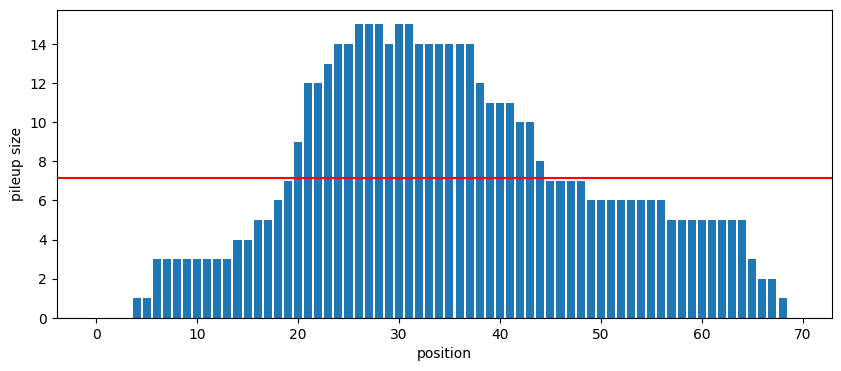

In [21]:
import matplotlib.pyplot as plt


def plot_pileups(
    reference_sequence: str, pileup_sizes: npt.NDArray[np.float64]
) -> None:
    """Plot the pileup sizes."""
    plt.figure(figsize=(10, 4))
    plt.bar(x=range(len(reference_sequence)), height=pileup_sizes)
    plt.axhline(y=coverage(pileup_sizes=pileup_sizes), color="r")
    plt.xlabel("position")
    plt.ylabel("pileup size")
    plt.show()


plot_pileups(reference_sequence=reference_sequence, pileup_sizes=pileup_sizes)

# Simulating the Sequencing of an _E. coli_ Genome

To provide a more realistic example, we provide the reference genome of _E. coli_ strain DH10B as FASTA file `e-coli-dh10b.fasta` (in the `data/` folder).

> _E. coli_ is a bacterium that is commonly found in the lower intestine of warm-blooded organisms.
> It has a circular DNA molecule approximately 4.6 million base pairs in length, containing more than 4000 protein-coding genes (organized into more than 2500 operons), and several ribosomal RNA (rRNA) operons as well as dozens of transfer RNA (tRNA) genes.

> The [FASTA format](https://en.wikipedia.org/wiki/FASTA_format) is a text-based format for representing either nucleotide sequences or amino acid (protein) sequences, in which nucleotides or amino acids are represented using single-letter codes.
>
> The format allows for sequence names and comments to precede the sequences.
> It originated from the [FASTA software package](https://en.wikipedia.org/wiki/FASTA), but has become a de-facto standard.
>
> A sequence begins with a greater-than character (`>`) immediately followed by a description of the sequence (all in a single line).
> The next lines immediately following the description line are the sequence representation, with one letter per amino acid or nucleic acid.
> An example of a multiple sequence FASTA file follows.
>
> ```
> >SEQUENCE_1
> MTEITAAMVKELRESTGAGMMDCKNALSETNGDFDKAVQLLREKGLGKAAKKADRLAAEG
> LVSVKVSDDFTIAAMRPSYLSYEDLDMTFVEN
> >SEQUENCE_2
> SATVSEINSETDFVAKNDQFIALTKDTTAHIQSNSLQSVEELHSSTINGVKFEEYLKSQI
> ATIGENLVVRRFATLKAGANGVVNGYIHTNGRVGVVIAAACDSAEVASKSRDLLRQICMH
> ```

##### ❓ Reading FASTA files

Complete the function `read_fasta_file()` to read a FASTA file into a dictionary.
In the dictionary, the sequence descriptions are the keys, and the actual sequences are the values.
Use the function to read in `e-coli-dh10b.fasta`.

In [22]:
def read_fasta_file(file_path: str) -> Dict[str, str]:
    """Read a FASTA file."""
    sequences = {}

    with open(file=file_path, mode="r") as file:
        current_description = None
        for line in file:
            line = line.strip()
            if line.startswith(">"):
                current_description = line[1:]
                sequences[current_description] = ""
            else:
                sequences[current_description] += line

    return sequences


ecoli_genome = read_fasta_file(file_path="data/e-coli-dh10b.fasta")
ecoli_genome_sequence = ecoli_genome[
    "NZ_CP110018.1 Escherichia coli strain DH10B chromosome, complete genome"
]

print(f"Read E. coli genome with length {len(ecoli_genome_sequence):,}.")

Read E. coli genome with length 4,687,487.


##### ❓ Visualizing _E. coli_ pileups

Now do the following for the _E. coli_ genome:

1. Truncate the genome to a length of 1000 bases.
2. Sample 1000 reads with a minimum/maximum length of 100/250.
3. Compute the pileup sizes.
4. Plot the pileup sizes and the coverage.

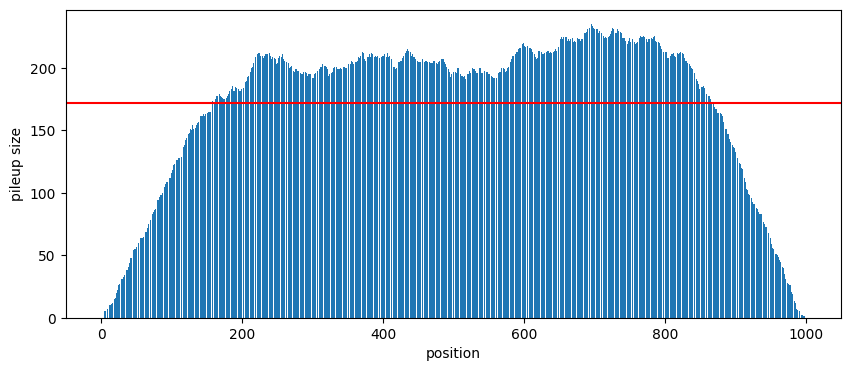

In [26]:
ecoli_genome_sequence_truncated = ecoli_genome_sequence[:1000]

reads = sample_reads(
    reference_sequence=ecoli_genome_sequence_truncated,
    n_reads=1000,
    min_read_len=100,
    max_read_len=250,
)

pileup_sizes = compute_pileup_sizes(
    reference_sequence=ecoli_genome_sequence_truncated, reads=reads
)

plot_pileups(
    reference_sequence=ecoli_genome_sequence_truncated, pileup_sizes=pileup_sizes
)